In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from konlpy.tag import Okt


In [2]:
reviews_df = pd.read_csv("./bangbang_makguksu_reviews.csv")

In [3]:
reviews_df

,작성 날짜,리뷰 내용
0,2024.10.28.,깔끔해요 양념이 좀 쎄요
1,2024.10.26.,들기름 막국수 존맛
2,2024.10.26.,제로페이 된다고 광고해서 갓더니 안된다고 나가라고 하네요. 정정해놔라 헛걸음하게하지말고
3,2024.10.16.,클라이밍 하러갔다가 발견한 맛집\n종종 생각나서 먹으러 갈듯합니다
4,2024.10.16.,맛있고 직원친절도도 나쁘지 안았다\n음식이 이쁘게 나와서 사진 찍기도 좋왔다\n다...
...,...,...
234,2021.02.07.,가격대가 있지만 여전히 맛있고 친절하네요 메밀전병 대신에 김치 군만두가 있는데 맛있어요!
235,2021.02.03.,너무 맛있었어요!!
236,2021.01.05.,들기름 막국수 최고. 일단 가게가 정말 깨끗하고 깔끔해서 안심하고 먹을 수 있습니다...
237,2020.09.04.,코다리는 괜찮은데 육전은 비추. 고기냄새 나서 2만원 진짜 아까웠음


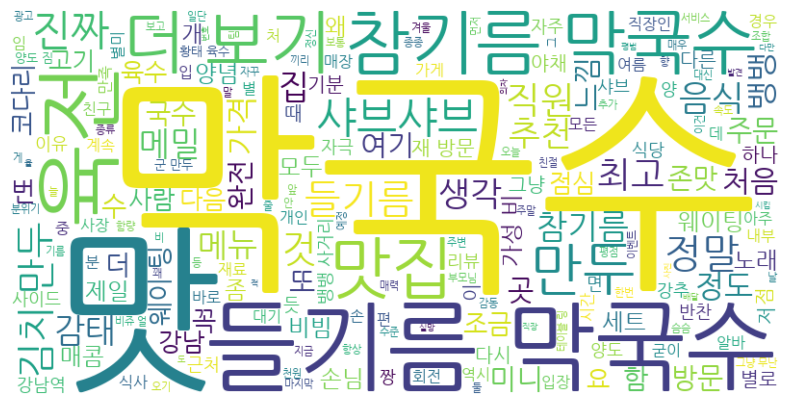

In [5]:
# 텍스트 데이터 전처리
text_data = ' '.join(review for review in reviews_df['리뷰 내용'].astype(str))

# 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text_data)
nouns_text = ' '.join(nouns)

# WordCloud 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 (윈도우 기준)
    width=800,
    height=400,
    background_color='white'
).generate(nouns_text)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
from nltk import FreqDist

In [8]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 'NanumGothic'이 설치된 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

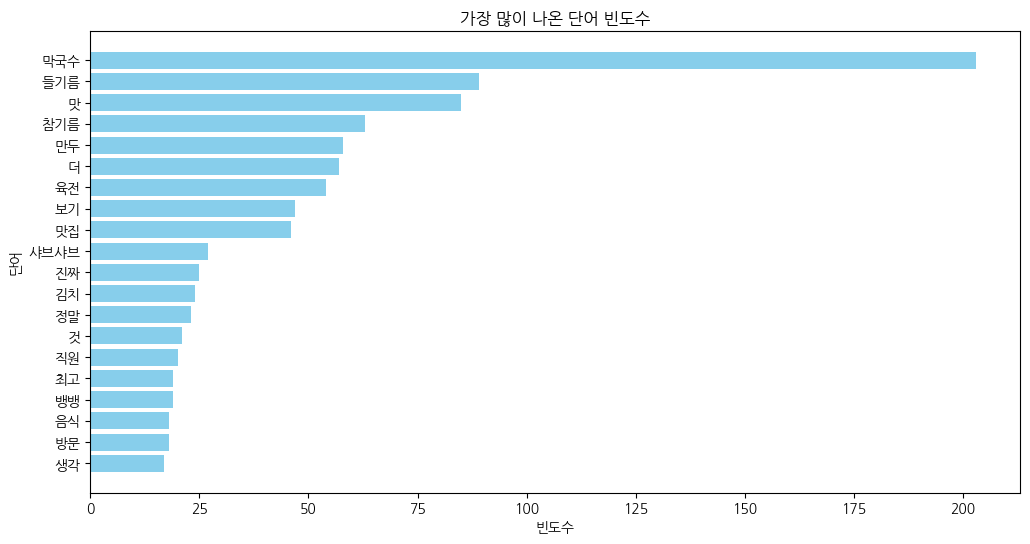

In [9]:
# 텍스트 데이터 전처리
text_data = ' '.join(review for review in reviews_df['리뷰 내용'].astype(str))

# 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text_data)

# 단어 빈도수 계산
word_freq = FreqDist(nouns)

# 가장 많이 나온 상위 20개 단어 선택
top_words = word_freq.most_common(20)

# 단어와 빈도수를 분리
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# 막대그래프 생성
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('가장 많이 나온 단어 빈도수')
plt.gca().invert_yaxis()  # 빈도수가 높은 단어가 위로 오도록 설정
plt.show()

In [10]:
from collections import Counter

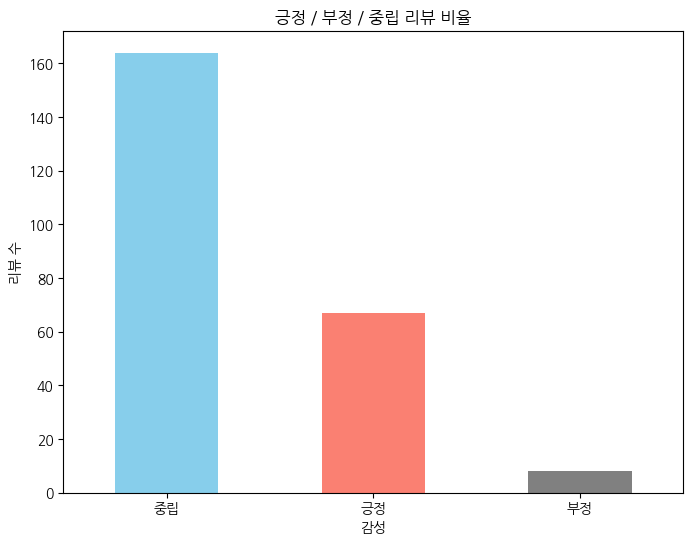

In [21]:
# 감성 사전 로드
# 간단한 긍정/부정 단어 리스트를 정의 (한국어 감성 사전을 사용하는 것이 이상적)
positive_words = ["맛있다", "좋다", "최고", "추천", "친절", "감사", "훌륭", "깔끔", "행복","존맛","JMT","맛집",]
negative_words = ["별로", "나쁘다", "불친절", "비싸다", "최악", "실망", "불만", "더럽다","헛걸음"]

# 형태소 분석기 (Okt) 초기화
okt = Okt()

# 리뷰에 대한 감성 점수 계산 함수
def sentiment_score(text):
    tokens = okt.morphs(text)  # 형태소 추출
    pos_count = sum(1 for word in tokens if word in positive_words)
    neg_count = sum(1 for word in tokens if word in negative_words)
    if pos_count > neg_count:
        return "긍정"
    elif neg_count > pos_count:
        return "부정"
    else:
        return "중립"

# NaN 값을 빈 문자열로 대체
reviews_df['리뷰 내용'] = reviews_df['리뷰 내용'].fillna('')
# 감성 점수 계산
reviews_df['감성'] = reviews_df['리뷰 내용'].apply(sentiment_score)

# 감성 분석 결과 개수 카운트
sentiment_counts = reviews_df['감성'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])
plt.title('긍정 / 부정 / 중립 리뷰 비율')
plt.xlabel('감성')
plt.ylabel('리뷰 수')
plt.xticks(rotation=0)
plt.show()

In [22]:
# 각 감성별 리뷰 예시를 추출
num_samples = 3  # 감성별로 출력할 리뷰 수 설정

# 중립 리뷰 예시
neutral_reviews = reviews_df[reviews_df['감성'] == '중립']['리뷰 내용'].head(num_samples)
print("중립 리뷰 예시:")
print(neutral_reviews)

# 긍정 리뷰 예시
positive_reviews = reviews_df[reviews_df['감성'] == '긍정']['리뷰 내용'].head(num_samples)
print("\n긍정 리뷰 예시:")
print(positive_reviews)

# 부정 리뷰 예시
negative_reviews = reviews_df[reviews_df['감성'] == '부정']['리뷰 내용'].head(num_samples)
print("\n부정 리뷰 예시:")
print(negative_reviews)


중립 리뷰 예시:
0                                        깔끔해요 양념이 좀 쎄요
5    적당히 맛있어요. 웨이팅이 조금 고역인데 앞에 의자도 있고 해서 괜찮아요. 골목길 ...
7                               항상 여름에 배달시켜먹는데 너무 맛있어요
Name: 리뷰 내용, dtype: object

긍정 리뷰 예시:
1                                           들기름 막국수 존맛
3                 클라이밍 하러갔다가 발견한 맛집\n종종 생각나서 먹으러 갈듯합니다
4    맛있고 직원친절도도 나쁘지 안았다\n음식이 이쁘게 나와서  사진 찍기도 좋왔다\n다...
Name: 리뷰 내용, dtype: object

부정 리뷰 예시:
2      제로페이 된다고 광고해서 갓더니 안된다고 나가라고 하네요. 정정해놔라 헛걸음하게하지말고
9     들기름막구수 맛있었다\n기대했던 육전은 오히려 별로였음 실망 ㅠ\n만두랑 참기름막국...
29    ‘막국수’가 아니라 ‘새로운 국수’를 먹으러 왔다고 생각해야 할 듯합니다.\n아랫분...
Name: 리뷰 내용, dtype: object
